## **UN Data Exploration Practice**



1. This project provided an opportunity to practice some exploratory analysis on two country-level metrics, gross domestic product (GDP) per capita and overall life expectancy. After downloading a dataset named Gross Domestic Product (GDP) per capita dataset from http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD. Rename it to gdp_per_capita.csv and place it in the data folder of your project repository.

2. Create a Jupyter Notebook in the notebooks folder and name it UN_Data_Exploration.

3. import the required packages with their customary aliases as follows:

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4. create a DataFrame called **gdp_df** from a CSV file named **gdp_per_capita.csv** by using the panda read_csv(). This file was downloaded from [UN data A wordl of information website] (http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD) as the Gross Domestic Product (GDP) per capita dataset, renamed it to the gdp_per_capita.csv and saved in the data folder of my project repository.

In [7]:

gdp_df = pd.read_csv('gdp_per_capita.csv.csv')


#inspect data in the firt 10 rows

In [9]:
gdp_df.head(10)


,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
5,Afghanistan,2016,2101.422187,NaN
6,Afghanistan,2015,2108.714173,NaN
7,Afghanistan,2014,2144.449634,NaN
8,Afghanistan,2013,2165.340915,NaN
9,Afghanistan,2012,2122.830759,NaN


#inspect data in the last 10 rows

In [11]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
7652,Zimbabwe,1999,2866.032886,NaN
7653,Zimbabwe,1998,2931.725144,NaN
7654,Zimbabwe,1997,2896.147308,NaN
7655,Zimbabwe,1996,2867.026043,NaN
7656,Zimbabwe,1995,2641.378271,NaN
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


5. remove column named "Value Footnotes" 

In [13]:
gdp_df.drop(columns = ['Value Footnotes'], inplace=True)

rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

In [15]:
dict = {'Country or Area':'Country', 'Year':'Year', 'Value':'GDP_Per_Capita'}

In [16]:
gdp_df.rename(columns=dict, inplace=True)

6. check rows and columns of gdp_df DataFrame

In [18]:
print(gdp_df.shape)

(7662, 3)


gdp_df DataFrame has 7662 rows and 3 columns

check the data types of its columns

In [21]:
print(gdp_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7662 non-null   object 
 1   Year            7662 non-null   int64  
 2   GDP_Per_Capita  7662 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 179.7+ KB
None


gdp_df DataFrame has 3 columns including Country as object type, Year as int64 and GDP_Per_Capita as float64 data type. 

7. check range of year and the number of observations per year in this dataset 

In [24]:
gdp_df.groupby('Year').count()


,Country,GDP_Per_Capita
Year,,
1990,207,207
1991,208,208
1992,210,210
1993,211,211
1994,213,213
1995,223,223
1996,223,223
1997,226,226
1998,226,226


Data were collected from 1990 to 2022. Number of observations steadily increased from 1990 to 2013. After 2013, the number of observations remained stable until a sharp decline occurred in 2022.

8. find how many countries are in the dataset and return countries that are least represented in the dataset

In [27]:
gdp_df.drop_duplicates(subset=['Country'])

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
20,Africa Eastern and Southern,2022,3553.913370
53,Africa Western and Central,2022,4063.857691
86,Albania,2022,15501.662931
119,Algeria,2022,11187.382303
...,...,...,...
7501,Viet Nam,2022,11396.531469
7534,West Bank and Gaza,2022,5722.409175
7563,World,2022,17485.934316
7596,Zambia,2022,3298.142890


In [28]:
gdp_df.groupby('Country').value_counts(ascending=True)

Country      Year  GDP_Per_Capita
Afghanistan  2002  1280.463171       1
             2003  1292.333437       1
             2004  1260.060581       1
             2005  1352.320627       1
             2006  1366.993146       1
                                    ..
Zimbabwe     2018  2399.621551       1
             2019  2203.396810       1
             2020  1990.319419       1
             2021  2115.144555       1
             2022  2143.237574       1
Name: count, Length: 7662, dtype: int64

This dataset includes 242 countries, with Afghanistan being the least represented. One possible explanation is that data for this country were collected only from 2002 to 2006.

9. creat a new dataframe gdp_2021 by selecting only 2021 data from gdp_df

In [31]:
gdp_2021 = gdp_df[gdp_df['Year'] == 2021]

10. find the summary statistics for GDP per capita in 2021

In [33]:
gdp_2021.describe()

,Year,GDP_Per_Capita
count,241.0,241.000000
mean,2021.0,20711.570080
std,0.0,20916.978968
min,2021.0,714.066712
25%,2021.0,5044.196028
50%,2021.0,13754.802423
75%,2021.0,30974.370692
max,2021.0,115683.493708


11. creat a histogram of GDP Per Capita numbers for 2021


<Axes: title={'center': 'UN data GDP Per Capita in 2021'}, xlabel='GDP_Per_Capita', ylabel='Frequency'>

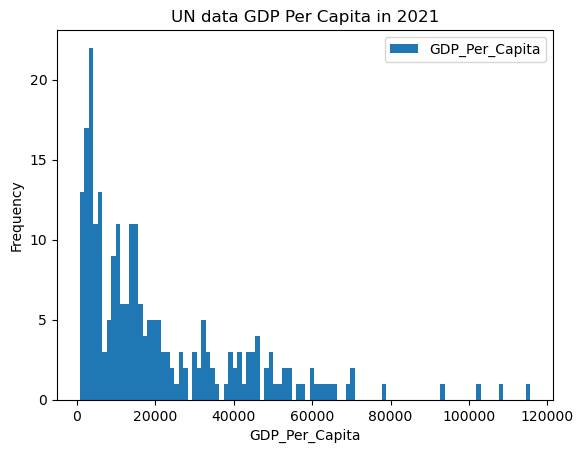

In [35]:
gdp_2021.plot.hist(column=['GDP_Per_Capita'], ylabel='Frequency', xlabel='GDP_Per_Capita', title='UN data GDP Per Capita in 2021', bins=100)

The distribution of GDP per capita is right skewed indicating that there were more low GDP per capita countries in the data set.

12. Find the top 5 counties by GDP per capita in 2021.

In [38]:
gdp_2021.sort_values('GDP_Per_Capita', ascending=False).head(5).set_index('Country')


,Year,GDP_Per_Capita
Country,,
Luxembourg,2021,115683.493708
Singapore,2021,107741.118436
Ireland,2021,102785.490239
Qatar,2021,92862.571798
Bermuda,2021,78570.489515


find the bottom 5 countries by GDP per capita in 2021.

In [40]:
gdp_2021.sort_values('GDP_Per_Capita', ascending=True).head(5).set_index('Country')

,Year,GDP_Per_Capita
Country,,
Burundi,2021,714.066712
Central African Republic,2021,837.504686
Dem. Rep. Congo,2021,1073.643271
Somalia,2021,1136.735989
Niger,2021,1186.576809


13.creat a dataframe named gdp_pivoted including the data for only 1990 and 2021. Each row represents a country, each column represents a year and the values in the table are the GDP_Per_Capita amount.The dataframe does not include any missing values

In [42]:
gdp_pivote = gdp_df.pivot_table(index='Country', columns = 'Year', values = 'GDP_Per_Capita').dropna()
gdp_1991 = gdp_pivote.iloc[: , 0:1]
gdp_2021 = gdp_pivote.iloc[: , 31:32]
gdp_pivoted = pd.merge(left = gdp_1991, right = gdp_2021, on = 'Country')

14	Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2021. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [44]:
gdp_pivoted['Percent_Change'] = 100*(gdp_pivoted[2021] - gdp_pivoted[1990]) / gdp_pivoted[1990]
gdp_pivoted.head()



Year,1990,2021,Percent_Change
Country,,,
Africa Eastern and Southern,3037.297466,3519.174840,15.865334
Africa Western and Central,2788.301039,4014.607965,43.980435
Albania,4827.027705,14595.944386,202.379544
Algeria,8828.874473,11029.138782,24.921232
Angola,5793.084512,5911.835657,2.049878


15	How many countries experienced a negative percent change in GDP per capita from 1990 to 2021?

In [46]:
gdp_pivoted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, Africa Eastern and Southern to Zimbabwe
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   1990            202 non-null    float64
 1   2021            202 non-null    float64
 2   Percent_Change  202 non-null    float64
dtypes: float64(3)
memory usage: 6.3+ KB


In [47]:
neg_GDP = gdp_pivoted.groupby('Country')['Percent_Change'].apply(lambda x: x < 0)


In [48]:
neg_GDP.sum()

19

There are 19 countries with a negative percent change in GDP per capita from 1990 to 2021.

16	Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2018. Create another showing the country with the second highest % change in GDP.


In [51]:
gdp_pivoted.nlargest(10,columns='Percent_Change')

Year,1990,2021,Percent_Change
Country,,,
Equatorial Guinea,936.419751,14637.007350,1463.081870
China,1423.896348,17657.495181,1140.082904
East Asia & Pacific (excluding high income),2191.972060,15415.447708,603.268440
East Asia & Pacific (IDA & IBRD),2218.031627,15586.699395,602.726652
Myanmar,581.613311,4032.625653,593.351678
Viet Nam,2099.394649,10628.219166,406.251608
Guyana,4818.387995,21925.186859,355.031577
Lao PDR,1939.086239,7846.975022,304.673854
Ireland,26781.627609,102785.490239,283.791052


Equatorial Guinea had the highest % change in GDP per capita from 1990 to 2021 followed by China.

In [53]:
gdp_Equatorial = gdp_df[(gdp_df['Country'] == 'Equatorial Guinea')]
gdp_to_2018 = gdp_Equatorial.drop(gdp_Equatorial[gdp_Equatorial['Year'] > 2018].index)


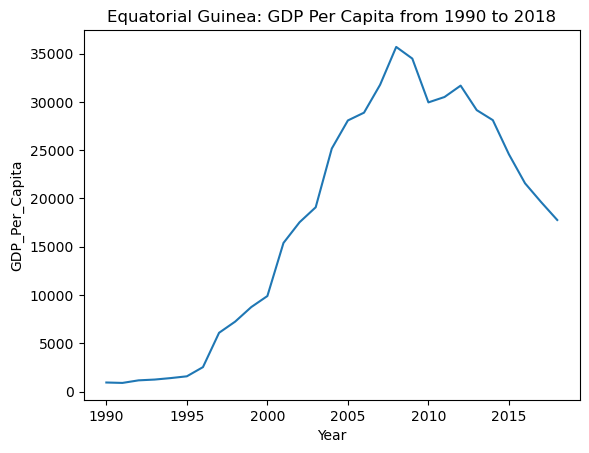

In [54]:
line_plot_= sns.lineplot(x= 'Year', y='GDP_Per_Capita', data= gdp_to_2018 )
plt.title('Equatorial Guinea: GDP Per Capita from 1990 to 2018')
plt.show()


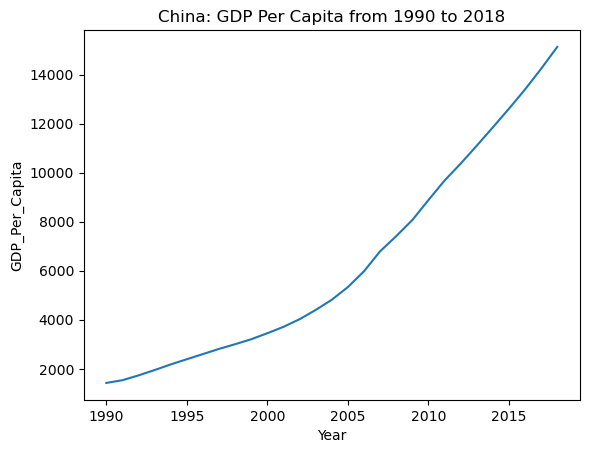

In [55]:
gdp_China = gdp_df[(gdp_df['Country'] == 'China')]
gdp_China_trimmed = gdp_China.drop(gdp_China[gdp_China['Year'] > 2018].index)
line_plot_= sns.lineplot(x= 'Year', y='GDP_Per_Capita', data= gdp_China_trimmed)
plt.title('China: GDP Per Capita from 1990 to 2018')
plt.show()


GDP per capita of China is steadily increased from 1990 to 2018 but Equatorial Guinea had declined GDP per capita after 2007.

In [57]:
Bonus: Put both line charts on the same plot.

SyntaxError: invalid syntax (2578004357.py, line 1)

In [ ]:
gdp_selected = gdp_df[(gdp_df['Country'] == 'China') | (gdp_df['Country'] == 'Equatorial Guinea')]
gdp_year_trimmed = gdp_selected.drop(gdp_selected[gdp_selected['Year'] > 2018].index)
gdp_year_trimmed.set_index('Year', inplace=True)
gdp_year_trimmed.groupby("Country")["GDP_Per_Capita"].plot(legend=True, xlabel="Year", ylabel="GDP Per Capita")
plt.title('GDP Per Capital from 1990 to 2018')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

17. creat a dataframe named continents from continents.csv

In [ ]:
continents = pd.read_csv('continents.csv')
print(continents)
print(gdp_df)


18. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [ ]:
gdp_df = pd.merge(left = gdp_df, right = continents, on = "Country")

19. Determine the number of countries per continent. Create a bar chart showing this.

In [ ]:
gdp_count = gdp_df.groupby("Continent")["Country"].count().drop_duplicates()

In [ ]:
gdp_count.plot.bar(ylabel="number of countries", title="The Number of Countries per Continent")
plt.xticks(rotation=45)

20. Create a seaborn boxplot showing GDP per capita in 2021 split out by continent. What do you notice?

In [ ]:
gdp_df_2021 = gdp_df.loc[(gdp_df["Year"] == 2021), "GDP_Per_Capita"]
sns.boxplot(x="Continent", y="GDP_Per_Capita", data=gdp_df)
plt.title("GDP per Capita in 2021 by Continent")
plt.xticks(rotation=45)




21. Download the full csv containing Life expectancy at birth, total (years) from https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false. Read this data into a DataFrame named life_expectancy. Note: When reading this dataset it, you may encounter an error. Modify your read_csv call to correct this without modifying the original csv file.

In [ ]:
life_expectancy = pd.read_csv("API_SP.DYN.LE00.IN_DS2_en_csv_v2_31632.csv", header=[2])

22. Drop the Country Code, Indicator Name, and Indicator Code columns. Then use .melt() to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to Country, Year, and Life_Expectancy.

In [ ]:
life_expectancy.drop(columns=["Country Code", "Indicator Name", "Indicator Code", "Unnamed: 68"], inplace=True)
life_expectancy.dropna()

 Transform data to show multiple rows per country and a single column for year. rename the columns to Country, Year, and Life_Expectancy

In [ ]:
life_expectancy = life_expectancy.melt(id_vars = 'Country Name', value_vars = life_expectancy[1:], var_name = 'Year', value_name = 'Life_Expectancy')
life_expectancy.rename(columns = {'Country Name':'Country'}, inplace=True)
print(life_expectancy)

23. What was the first country with a life expectancy to exceed 80?

In [ ]:
life_expectancy.loc[life_expectancy['Life_Expectancy'] >= 80].head()

Japan achieved a life expectancy of 80 in 1996, making it the the first country in the dataset to surpass this milestone

24. Merge gdp_df and life_expectancy, keeping all countries and years that appear in both DataFrames. 

In [ ]:
life_expectancy = life_expectancy.astype({"Year": int})
gdp_le = pd.merge(left = gdp_df, right = life_expectancy, on = ["Country", "Year"])


Look at the first five rows of your new data frame to confirm it merged correctly

In [ ]:
gdp_le.head(5)


check the last five rows to make sure the data is clean and as expected.

In [ ]:
gdp_le.tail(5)

25. Create a new DataFrame, named gdp_le_2021 by extracting data for the year 2021 from gdp_le. How many countries have a life expectancy of at least 80 in 2021?

In [ ]:
gdp_le_2021 = gdp_le.loc[gdp_le["Year"] == 2021]
gdp_le_2021.loc[gdp_le_2021["Life_Expectancy"] >= 80]["Country"].count()


In 2021, thirty one countries have a life expectancy of at least 80.

26. Find the countries that had the top 3 largest GDP per capita figures for 2021.
    using nlargest() with arguments to select 3 countries with the highest number from column named GDP_Per_Capita

In [ ]:
largest_GDP_Per_Capita_countries = gdp_le_2021.nlargest(3, "GDP_Per_Capita")
print(largest_GDP_Per_Capita_countries)

Create a seaborn FacetGrid showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

In [ ]:
gdp_three_countries = gdp_le[(gdp_le["Country"] == "Luxembourg") | (gdp_le["Country"] == "Singapore")
| (gdp_le["Country"] == "Ireland")]


In [ ]:
graph = sns.FacetGrid(gdp_three_countries, col = "Country")
graph.map(plt.scatter, "Year", "Life_Expectancy")
plt.show()

27. Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2021.

In [ ]:
x = gdp_le_2021['GDP_Per_Capita']
y = gdp_le_2021['Life_Expectancy']
plt.scatter(x, y, c = "Blue")
plt.xlabel ('GDP Per Capita')
plt.ylabel ('Life Excectancy')
plt.title ('Life Expectancy vs GDP per Capita for the year 2021')
plt.show()

The plot indicates a strong positive correlation between GDP per capita and life expectancy when countries have GDP per capita from 0 to 60,000. As the GDP per capita increaes, the life expectancy also trends to increase. However, this data set will not provide a correct prediction of life expectancy in a country with GDP per capita higher than 60,000.

28. Find the correlation between Life Expectancy and GDP per Capita for the year 2021. What is the meaning of this number?

In [ ]:
correlation = gdp_le_2021['Life_Expectancy'].corr(gdp_le_2021['GDP_Per_Capita'])
print(correlation)

Perfect strong positive relationships between two variables produce correlation coefficients as +1 whereas, strong negative relationship will produce the correlation coefficients as -1. In this correlation analysis, the correlation coefficient is 0.745 indicating a strong positive association between the selected two variables. 

29.	Add a column to gdp_le_2021 and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.

In [ ]:
gdp_le_2021['log_GDP'] = np.log(gdp_le_2021['GDP_Per_Capita'])


In [ ]:
correlation2 = gdp_le_2021['Life_Expectancy'].corr(gdp_le_2021['log_GDP'])
print(correlation2)

create a scatter plot showing Life Expectancy vs log(GDP per Capita) for the year 2021

In [ ]:
x = gdp_le_2021['log_GDP']
y = gdp_le_2021['Life_Expectancy']
plt.scatter(x, y, c = "Blue")
plt.xlabel ('log(GDP Per Capita)')
plt.ylabel ('Life Excectancy')
plt.title ('Life Expectancy vs log(GDP per Capita) for the year 2021')
plt.show()

Appying Log() to a data set will transform a skewed data to more closely the normal distribution that can increase the correlation number because more residues will located closer to a fitted line.